# Modelo de Regresion Lineal

# 1. Análisis exploratorio de los datos (EDA)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB

Estadísticas descriptivas:
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03

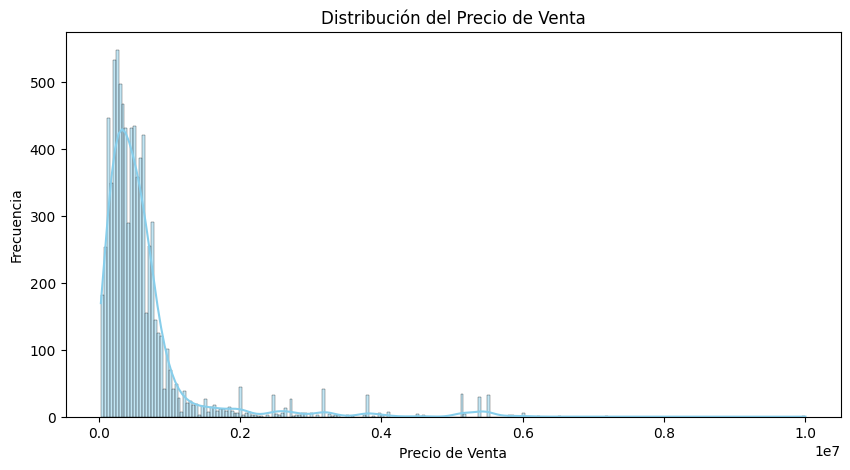

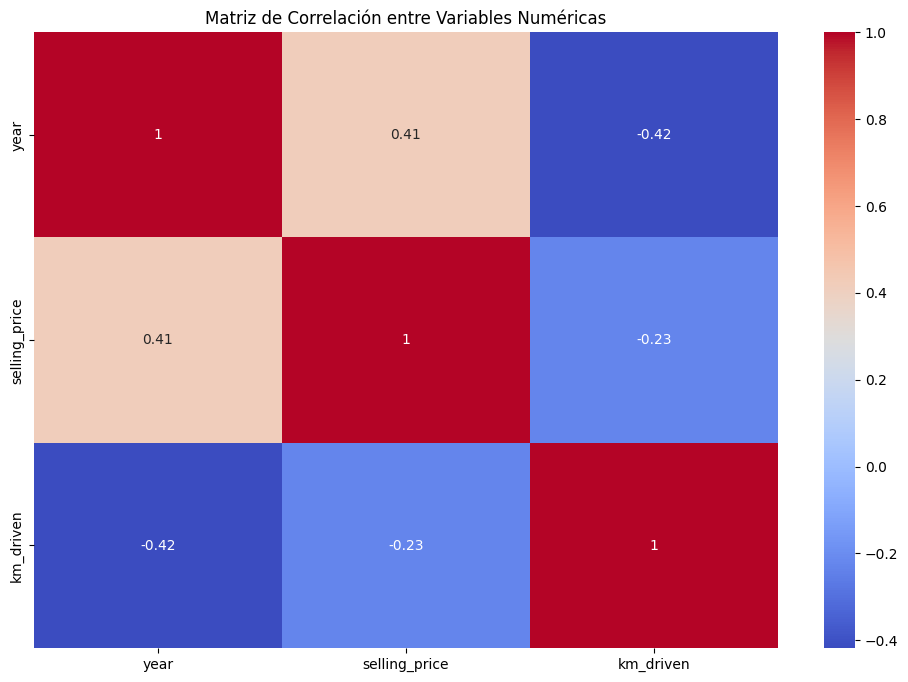

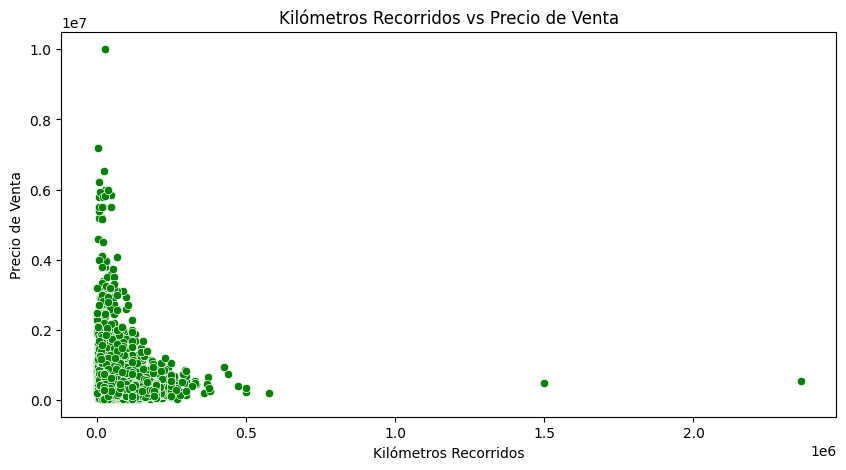

C:\Users\DIRECTOR FACTURACION\AppData\Local\Temp\ipykernel_23564\2597453377.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='selling_price', data=df, palette='viridis')


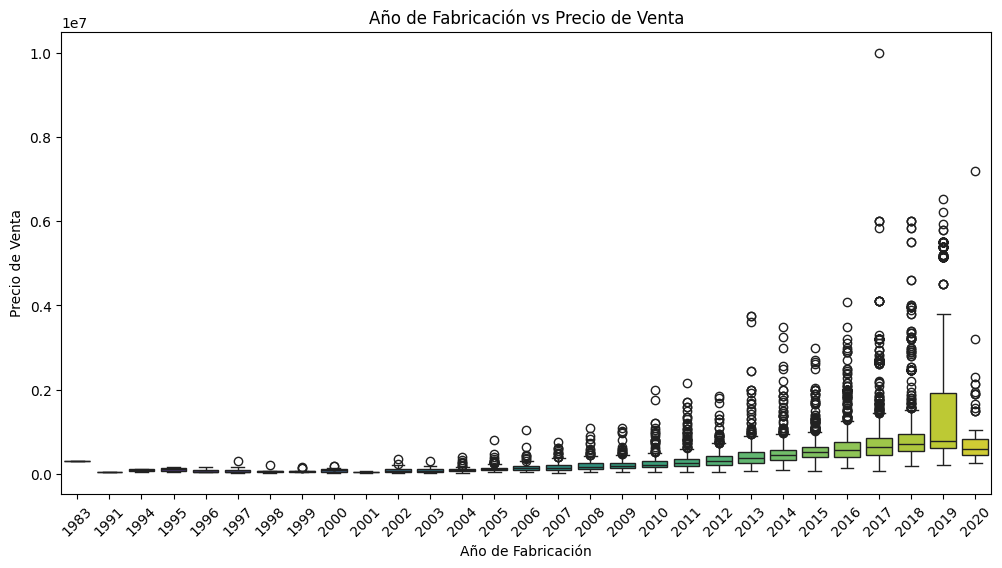

C:\Users\DIRECTOR FACTURACION\AppData\Local\Temp\ipykernel_23564\2597453377.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='selling_price', data=df, palette='Set2')


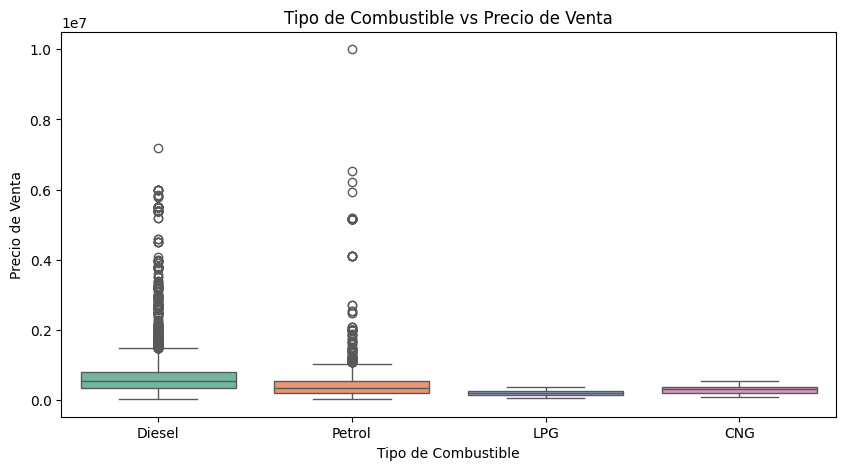

In [5]:
# Paso 1: Análisis Exploratorio de Datos (EDA)

# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('Car details v3.csv')

# Información general del dataset
print("Información general del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Gráficas para análisis exploratorio

# 1. Histograma del precio de venta
plt.figure(figsize=(10, 5))
sns.histplot(df['selling_price'], kde=True, color='skyblue')
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Asegurarse de que solo se usen columnas numéricas para la matriz de correlación
df_numeric = df[['year', 'selling_price', 'km_driven']].copy()

# 2. Gráfico de correlación entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# 3. Relación entre 'km_driven' y 'selling_price' (dispersión)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='km_driven', y='selling_price', data=df, color='green')
plt.title('Kilómetros Recorridos vs Precio de Venta')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio de Venta')
plt.show()

# 4. Relación entre 'year' y 'selling_price' (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=df, palette='viridis')
plt.title('Año de Fabricación vs Precio de Venta')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio de Venta')
plt.xticks(rotation=45)
plt.show()

# 5. Relación entre 'fuel' y 'selling_price' (boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x='fuel', y='selling_price', data=df, palette='Set2')
plt.title('Tipo de Combustible vs Precio de Venta')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta')
plt.show()


# 2.Preprocesamiento de los datos

In [7]:
# Paso 2: Preprocesamiento de los datos

# Copiar el dataframe original
df_cleaned = df.copy()

# Verificar los valores únicos en la columna 'mileage' para ver las diferentes unidades
print("Valores únicos en la columna 'mileage':")
print(df_cleaned['mileage'].unique())

# Manejo de valores nulos
df_cleaned.dropna(inplace=True)

# Convertir la columna 'mileage' a numérica eliminando diferentes tipos de unidades ('kmpl', 'km/kg')
df_cleaned['mileage'] = df_cleaned['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

# Convertir las columnas 'engine' y 'max_power' a numéricas, eliminando texto adicional
df_cleaned['engine'] = df_cleaned['engine'].str.replace(' CC', '').astype(float)
df_cleaned['max_power'] = df_cleaned['max_power'].str.replace(' bhp', '').astype(float)

# Convertir variables categóricas a numéricas
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

# Normalización (si es necesario para mejorar el rendimiento del modelo)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalizar las columnas numéricas
df_cleaned[['km_driven', 'engine', 'max_power', 'mileage', 'seats']] = scaler.fit_transform(
    df_cleaned[['km_driven', 'engine', 'max_power', 'mileage', 'seats']])

# Mostrar el dataframe limpio
df_cleaned.head()


Valores únicos en la columna 'mileage':
['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl'
 '19.3 kmpl' nan '18.9 kmpl' '18.15 kmpl' '24.52 kmpl' '19.7 kmpl'
 '22.54 kmpl' '21.0 kmpl' '25.5 kmpl' '26.59 kmpl' '21.5 kmpl' '20.3 kmpl'
 '21.4 kmpl' '24.7 kmpl' '18.2 kmpl' '16.8 kmpl' '24.3 kmpl' '14.0 kmpl'
 '18.6 kmpl' '33.44 km/kg' '23.95 kmpl' '17.0 kmpl' '20.63 kmpl'
 '13.93 kmpl' '16.0 kmpl' '17.8 kmpl' '18.5 kmpl' '12.55 kmpl'
 '12.99 kmpl' '14.8 kmpl' '13.5 kmpl' '26.0 kmpl' '20.65 kmpl' '27.3 kmpl'
 '11.36 kmpl' '17.68 kmpl' '14.28 kmpl' '18.53 kmpl' '14.84 kmpl'
 '21.12 kmpl' '20.36 kmpl' '21.27 kmpl' '18.16 kmpl' '22.0 kmpl'
 '25.1 kmpl' '20.51 kmpl' '21.66 kmpl' '25.2 kmpl' '22.9 kmpl'
 '16.02 kmpl' '20.54 kmpl' '22.77 kmpl' '15.71 kmpl' '23.1 kmpl'
 '19.02 kmpl' '19.81 kmpl' '26.2 km/kg' '16.47 kmpl' '15.04 kmpl'
 '19.1 kmpl' '21.79 kmpl' '18.8 kmpl' '21.21 kmpl' '15.37 kmpl'
 '11.79 kmpl' 

,year,selling_price,km_driven,mileage,engine,max_power,seats,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,torque_96.1Nm@ 3000rpm,torque_96Nm@ 2500rpm,torque_96Nm@ 3000rpm,torque_96Nm@ 3500rpm,torque_98Nm@ 1600-3000rpm,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm
0,2014,450000,1.343777,0.986157,-0.418188,-0.492024,-0.434128,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,0.894744,0.426198,0.077980,0.333827,-0.434128,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2006,158000,1.246926,-0.426129,0.075995,-0.380120,-0.434128,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,1.018008,0.887050,-0.124457,-0.044408,-0.434128,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,0.894744,-0.822561,-0.318955,-0.094765,-0.434128,False,False,False,...,False,False,False,False,False,False,False,False,False,False


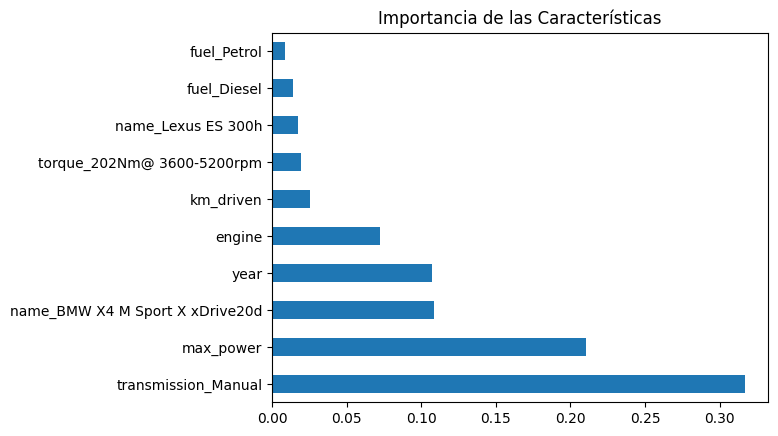

In [8]:
# Selección de características usando importancia de características (modelo de árbol de decisión)
from sklearn.ensemble import ExtraTreesRegressor

X = df_cleaned.drop(['selling_price'], axis=1)
y = df_cleaned['selling_price']

# Modelo de selección de características
model = ExtraTreesRegressor()
model.fit(X, y)

# Mostrar importancia de características
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()


# 3.División en conjunto de entrenamiento y prueba

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4.Entrenamiento del modelo

In [10]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 6.175561013133582e+29
R-squared: -8.88208204860785e+17


# 5. Evaluacion del modelo

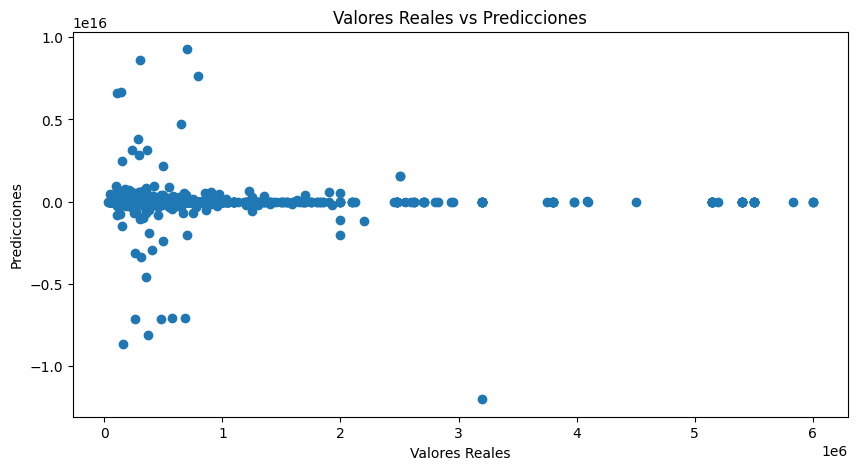

In [12]:
# Gráfico de dispersión entre valores predichos y reales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()
